# Analysis of Stack Overflow Developer Survey

## Introduction

- Stack Overflow conducts an annual survey in which they ask several questions like coding experience, languages used, platform used etc. from their user.
- Here, we will analyze that developer survey dataset which contains the responses of the user of stack Overflow. 
- In this analysis I used Python and its libraries like numpy, pandas, matplotlib, seaborn for yhe cleaning,analysing and visualisation purpose of the datsets.
- We can get the raw data from here: - https://insights.stackoverflow.com/survey

## Setup

In [1]:
# importing the needed modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 

# making sure that plots are inline with the notebook
%matplotlib inline

# choosing the plots style and their size and color and font size
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] =14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


## Data Wrangling

#### Loading the dataset and Checking out all the column we have

Let's load the CSV files using the Pandas library. We'll use the name survey_raw_df for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [2]:
# Making sure that datset show all the columns it have 
pd.set_option('display.max_columns',None)

In [3]:
# Loading the datset
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [4]:
survey_raw_df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

In [5]:
survey_raw_df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [6]:
# Getting the shape and types of our data
print(survey_raw_df.shape)
survey_raw_df.dtypes


(83439, 48)


ResponseId                        int64
MainBranch                       object
Employment                       object
Country                          object
US_State                         object
UK_Country                       object
EdLevel                          object
Age1stCode                       object
LearnCode                        object
YearsCode                        object
YearsCodePro                     object
DevType                          object
OrgSize                          object
Currency                         object
CompTotal                       float64
CompFreq                         object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
MiscTechHaveWorkedWith           object


The dataset contains over 83,000 responses to 48 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.



In [7]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=survey_raw_df.select_dtypes(include=numerics)
len(numeric_df.columns)

3

Let's view the list of columns in the data frame.

In [8]:
# Getting the names of each columns
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

It appears that shortcodes for questions have been used as column names.



In [9]:
#checking if there is any missing values in our data
survey_raw_df.info()
survey_raw_df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

ResponseId                      False
MainBranch                      False
Employment                       True
Country                         False
US_State                         True
UK_Country                       True
EdLevel                          True
Age1stCode                       True
LearnCode                        True
YearsCode                        True
YearsCodePro                     True
DevType                          True
OrgSize                          True
Currency                         True
CompTotal                        True
CompFreq                         True
LanguageHaveWorkedWith           True
LanguageWantToWorkWith           True
DatabaseHaveWorkedWith           True
DatabaseWantToWorkWith           True
PlatformHaveWorkedWith           True
PlatformWantToWorkWith           True
WebframeHaveWorkedWith           True
WebframeWantToWorkWith           True
MiscTechHaveWorkedWith           True
MiscTechWantToWorkWith           True
ToolsTechHav

In [10]:
# check if there is any duplicated rows in our data
survey_raw_df.duplicated().any()

False

We can refer to the schema file to see the full text of each question.

In [11]:
# Loading the schema of the dataset
schema_fname='survey_results_schema.csv'

In [12]:
schema_raw_df=pd.read_csv(schema_fname)

In [13]:
schema_raw_df.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [14]:
# getting the shape and type of data in schema
print(schema_raw_df.shape)
schema_raw_df.dtypes

(48, 6)


qid           object
qname         object
question      object
force_resp      bool
type          object
selector      object
dtype: object

In [15]:
# Getting only questions column from the schema
schema_raw = pd.read_csv(schema_fname,index_col='qname').question

In [16]:
schema_raw

qname
S0                    <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                              Browser Meta Info
S1                    <span style="font-size:22px; font-family: aria...
MainBranch            Which of the following options best describes ...
Employment            Which of the following best describes your cur...
Country               Where do you live? <span style="font-weight: b...
US_State              <p>In which state or territory of the USA do y...
UK_Country            In which part of the United Kingdom do you liv...
S2                    <span style="font-size:22px; font-family: aria...
EdLevel               Which of the following best describes the high...
Age1stCode            At what age did you write your first line of c...
LearnCode             How did you learn to code? Select all that apply.
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many ye


Here we observe that schema doesn't contain list of all columns of questions and also it contains extra row for other descriptions of the survey questions. And some of the rows and its decription are in HTML format. Here we are not making any changes in schema , we will do our analysis the available schema.
We can now use schema_raw to retrieve the full question text for any column in survey_raw_df.

In [17]:
schema_raw['Language']

'Which <b>programming, scripting, and markup languages</b> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [18]:
schema_raw['Webframe']

'Which <strong>web frameworks </strong><span style="font-weight: bolder;">and libraries</span> have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the framework and want to continue to do so, please check both boxes in that row.)'

In [19]:
schema_raw['UK_Country']

'In which part of the United Kingdom do you live? <i>This information will be kept private.</i>'

We've now loaded the dataset. We're ready to move on to the next step of preprocessing & cleaning the data for our analysis.



## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [20]:
selected_columns = [
    # Demographics
    'Country','Age','Gender','EdLevel',
    # Programming Experience
    'Age1stCode','YearsCode','YearsCodePro','NEWStuck','LanguageHaveWorkedWith','LanguageWantToWorkWith',
    # Employment
    'Employment','DevType','OrgSize','CompTotal'
]

In [21]:
len(selected_columns)

14

Let's extract a copy of the data from these columns into a new data frame survey_df. We can continue to modify further without affecting the original data frame.

In [22]:
survey_df = survey_raw_df[selected_columns].copy()

Let's view some basic information about the data frame.

In [23]:
survey_df.shape

(83439, 14)

In [24]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 83439 non-null  object 
 1   Age                     82407 non-null  object 
 2   Gender                  82286 non-null  object 
 3   EdLevel                 83126 non-null  object 
 4   Age1stCode              83243 non-null  object 
 5   YearsCode               81641 non-null  object 
 6   YearsCodePro            61216 non-null  object 
 7   NEWStuck                83052 non-null  object 
 8   LanguageHaveWorkedWith  82357 non-null  object 
 9   LanguageWantToWorkWith  76821 non-null  object 
 10  Employment              83323 non-null  object 
 11  DevType                 66484 non-null  object 
 12  OrgSize                 60726 non-null  object 
 13  CompTotal               47183 non-null  float64
dtypes: float64(1), object(13)
memory usage

Most columns have the data type *object*, either because they contain values of different types or contain empty values (*NaN*). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (83439). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.



In [25]:
schema_raw.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project) '

In [26]:
schema_raw.Employment

'Which of the following best describes your current <b>employment status</b>?'

In [27]:
schema_raw.YearsCode

'Including any education, how many years have you been coding in total?'

In [28]:
schema_raw.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [29]:
schema_raw.CompTotal

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in ${q://QID50/ChoiceGroup/SelectedChoicesTextEntry}? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [30]:
schema_raw.OrgSize

'Approximately how many people are employed by the company or organization you currently work for? '

In [31]:
survey_df.Age1stCode.unique()

array(['18 - 24 years', '11 - 17 years', '5 - 10 years', '25 - 34 years',
       '35 - 44 years', 'Younger than 5 years', '45 - 54 years',
       '55 - 64 years', nan, 'Older than 64 years'], dtype=object)

In [32]:
survey_df.YearsCode.unique()

array([nan, '7', '17', '3', '4', '6', '16', '12', '15', '10', '40', '9',
       '26', '14', '39', '20', '8', '19', '5', 'Less than 1 year', '22',
       '2', '1', '34', '21', '13', '25', '24', '30', '31', '18', '38',
       'More than 50 years', '27', '41', '42', '35', '23', '28', '11',
       '37', '44', '43', '36', '33', '45', '29', '50', '46', '32', '47',
       '49', '48'], dtype=object)

In [33]:
survey_df.YearsCodePro.unique()

array([nan, '10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1',
       '16', 'Less than 1 year', '15', '3', '35', '7', '8', '17', '14',
       '26', '25', '20', '50', '34', '11', '24', '22', '13', '31', '23',
       '39', '41', '27', '28', '19', '33', 'More than 50 years', '37',
       '29', '32', '43', '40', '38', '45', '42', '46', '36', '44', '47',
       '48', '49'], dtype=object)

In [34]:
survey_df.CompTotal.head(20)

0      4800.0
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     42000.0
10        NaN
11    43000.0
12    71500.0
13        NaN
14        NaN
15        NaN
16     9000.0
17    61000.0
18    18700.0
19        NaN
Name: CompTotal, dtype: float64

In [35]:
survey_df.OrgSize.unique()

array(['20 to 99 employees', nan, '100 to 499 employees',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '10,000 or more employees', '10 to 19 employees',
       '1,000 to 4,999 employees', '500 to 999 employees',
       '5,000 to 9,999 employees', '2 to 9 employees', 'I don’t know'],
      dtype=object)

In [36]:
survey_df.Age.unique()

array(['25-34 years old', '18-24 years old', '35-44 years old',
       'Prefer not to say', '45-54 years old', 'Under 18 years old',
       '65 years or older', '55-64 years old', nan], dtype=object)

Only one of the columns were detected as numeric columns (*CompTotal*), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric are converted to NaN.

In [37]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode,errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

In [38]:
survey_df.describe()

,YearsCode,YearsCodePro,CompTotal
count,79982.000000,58467.000000,4.718300e+04
mean,12.485722,9.572511,2.119407e+69
std,9.626184,8.123225,4.603702e+71
min,1.000000,1.000000,0.000000e+00
25%,5.000000,4.000000,1.600000e+04
50%,10.000000,7.000000,6.700000e+04
75%,17.000000,13.000000,1.400000e+05
max,50.000000,50.000000,1.000000e+74


In [39]:
survey_df['Gender'].value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [40]:
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace=True)

In [41]:
survey_df['Gender'].value_counts()

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

In [42]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,Age1stCode,YearsCode,YearsCodePro,NEWStuck,LanguageHaveWorkedWith,LanguageWantToWorkWith,Employment,DevType,OrgSize,CompTotal
52894,Canada,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,38.0,32.0,Go for a walk or other physical activity;Googl...,Bash/Shell;C;HTML/CSS;LISP;Python,LISP,Employed full-time,"DevOps specialist;Engineer, site reliability;S...","10,000 or more employees",NaN
67372,Australia,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,20.0,15.0,Call a coworker or friend;Visit Stack Overflow...,C#;HTML/CSS;JavaScript;SQL;TypeScript,Bash/Shell;Java,Employed full-time,"Developer, front-end;Developer, full-stack","1,000 to 4,999 employees",115000.0
61955,United States of America,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,15.0,9.0,Call a coworker or friend;Visit Stack Overflow...,Bash/Shell;C#;JavaScript;Node.js;PHP;Python;SQ...,Bash/Shell;C#;C++;JavaScript;Node.js;Rust;Type...,Employed full-time,"Developer, full-stack","10,000 or more employees",107000.0
65789,Singapore,55-64 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,49.0,30.0,Google it,C#,C#,Retired,NaN,"Just me - I am a freelancer, sole proprietor, ...",0.0
74981,Italy,Under 18 years old,Man,Primary/elementary school,11 - 17 years,4.0,NaN,Visit Stack Overflow,Assembly;C++;HTML/CSS;Java;JavaScript;Node.js,C#;C++;Crystal;Dart;F#;Go;Haskell;Java;JavaScr...,"Student, full-time",NaN,NaN,NaN
77113,United Kingdom of Great Britain and Northern I...,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,10.0,NaN,Call a coworker or friend;Visit Stack Overflow...,C#;C++;Go;HTML/CSS;Java;JavaScript;Node.js;Typ...,C#;Go;HTML/CSS;JavaScript;Kotlin;Node.js;Rust;...,"Not employed, but looking for work","Developer, full-stack;Developer, back-end;Student",NaN,NaN
79275,Brazil,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",35 - 44 years,7.0,NaN,Visit Stack Overflow;Google it,Bash/Shell;SQL;VBA,Bash/Shell;SQL;VBA,Employed full-time,Product manager,NaN,NaN
54174,Spain,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,4.0,2.0,Visit Stack Overflow;Watch help / tutorial vid...,C#;HTML/CSS;Java;JavaScript;Node.js;SQL;TypeSc...,HTML/CSS;JavaScript;Node.js;Python;SQL;TypeScript,Employed full-time,"Developer, front-end;Developer, full-stack;Dev...","1,000 to 4,999 employees",18000.0
43194,India,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,15.0,14.0,Visit Stack Overflow;Go for a walk or other ph...,Java,C++,Employed full-time,"Developer, back-end;Engineering manager","1,000 to 4,999 employees",3300000.0
66536,France,25-34 years old,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)",11 - 17 years,12.0,3.0,Go for a walk or other physical activity,C;HTML/CSS;JavaScript;Python;R;Rust;SQL,NaN,Employed full-time,"Developer, back-end;Academic researcher",20 to 99 employees,8000.0


## Exploratory Analysis and Visualization

### Country

In [43]:
schema_raw.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [44]:
survey_df.Country.nunique()

180

In [45]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States of America                                15051
India                                                   10476
Germany                                                  5568
United Kingdom of Great Britain and Northern Ireland     4447
Canada                                                   2983
France                                                   2685
Brazil                                                   2232
Poland                                                   1785
Netherlands                                              1759
Italy                                                    1659
Australia                                                1627
Spain                                                    1472
Russian Federation                                       1462
Sweden                                                   1179
Turkey                                                   1050
Name: Country, dtype: int64

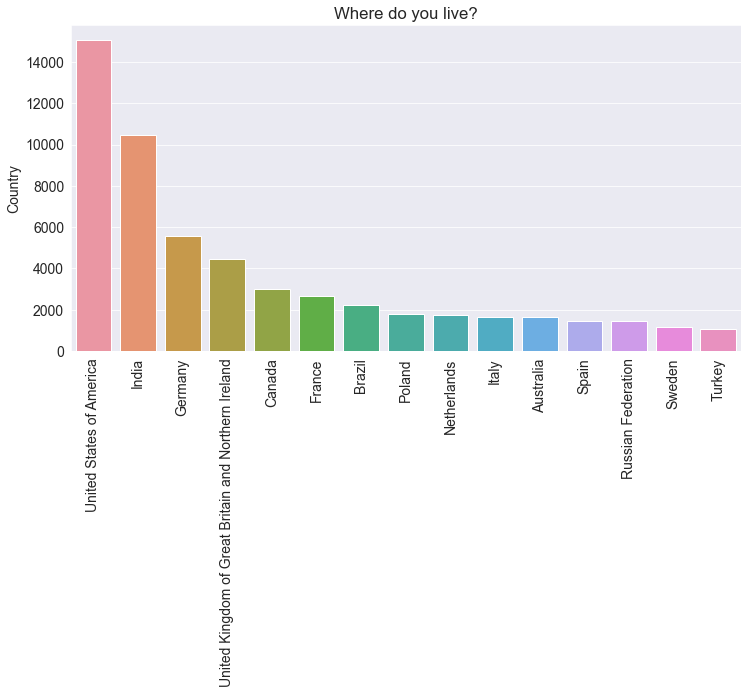

In [46]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=90)
# plt.title(schema.Country)
plt.title('Where do you live?')
sns.barplot(x= top_countries.index,y = top_countries);


### Age

In [47]:
schema_raw.Age

'What is your age?'

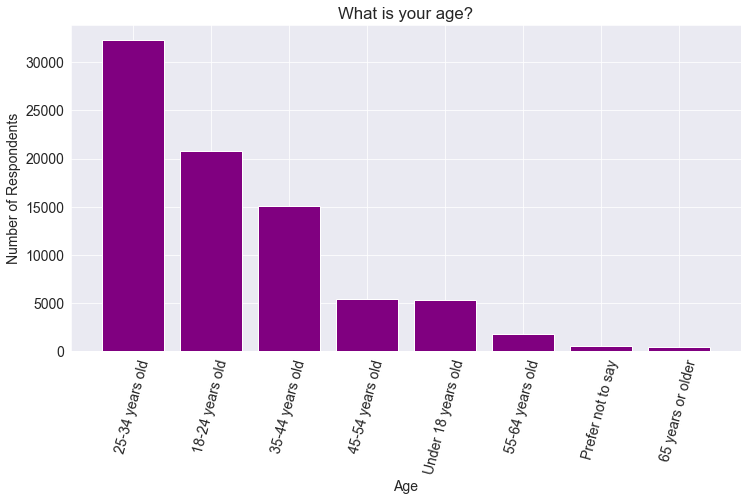

In [48]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
x=list(survey_df.Age.value_counts().keys())
y=list(survey_df.Age.value_counts())
plt.title(schema_raw.Age)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.bar(x,y,color='purple');

### Gender

In [49]:
schema_raw.Gender

'Which of the following describe you, if any? Please check all that apply.'

In [50]:
gender_counts=survey_df.Gender.value_counts()
gender_counts

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

In [51]:
gender_counts.rename({'Non-binary, genderqueer, or gender non-conforming':'Non-Conforming'},inplace=True)
gender_counts.rename({'Or, in your own words:':'In own words'},inplace=True)

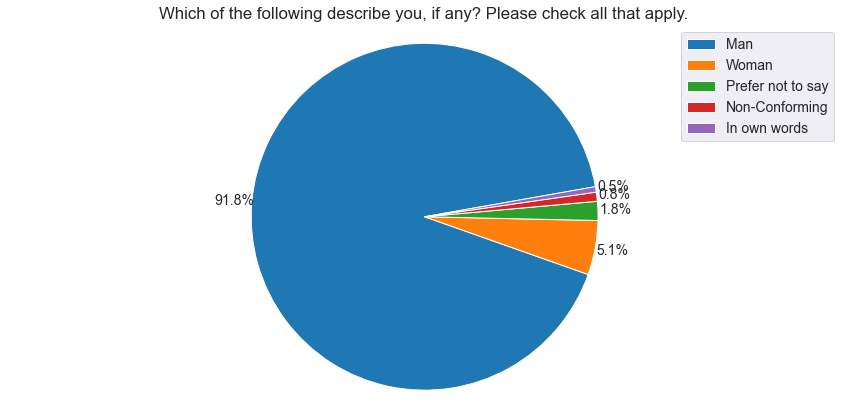

In [52]:
plt.figure(figsize=(12,6))
plt.title(schema_raw.Gender)
plt.pie(gender_counts, autopct='%1.1f%%',pctdistance=1.1,startangle=10)
plt.axis('equal')
plt.legend(gender_counts.index,loc='best')
plt.tight_layout();

### Education Level

In [53]:
schema_raw.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [54]:
survey_df.EdLevel.unique()

array(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Some college/university study without earning a degree',
       'Something else', 'Professional degree (JD, MD, etc.)',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       nan], dtype=object)

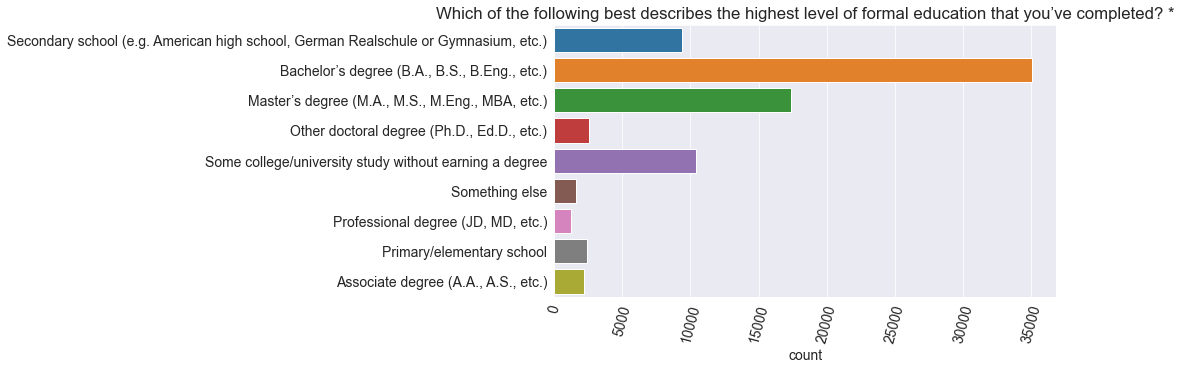

In [55]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema_raw['EdLevel'])
plt.ylabel(None);

### Employment

In [56]:
schema_raw.Employment

'Which of the following best describes your current <b>employment status</b>?'

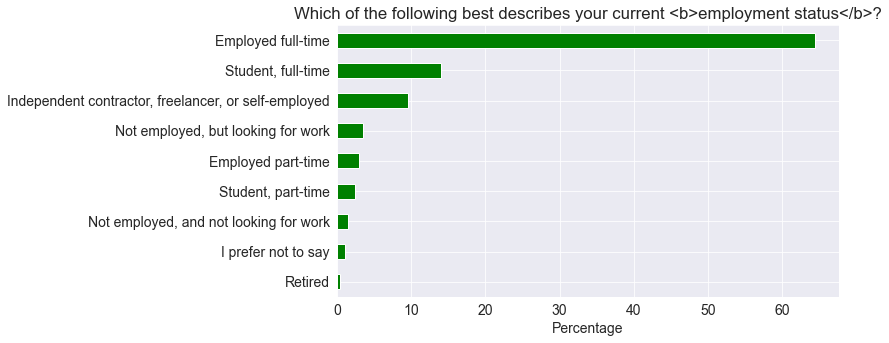

In [57]:
(survey_df.Employment.value_counts(normalize=True,ascending=True)*100).plot(kind='barh',color='g')
plt.title(schema_raw.Employment)
plt.xlabel('Percentage');

In [58]:
schema_raw.DevType

'Which of the following describes your current job? Please select all that apply.'

In [59]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                      8548
Developer, back-end                                                                                                                                                                                        5432
Developer, front-end                                                                                                                                                                                       2388
Developer, front-end;Developer, full-stack;Developer, back-end                                                                                                                                             2127
Developer, full-stack;Developer, back-end                                                                                                                               

In [60]:
def split_multicolumn(col_series):
    result_df=col_series.to_frame()
    options=[]
    #iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        #Break each value into list of options
        for option in value.split(';'):
            #Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option]=False
            # Mark the value in the option column as True
            result_df.at[idx,option]=True
    return result_df[options]        

In [61]:
dev_type_df=split_multicolumn(survey_df.DevType)

In [62]:
dev_type_df

,"Developer, mobile","Developer, front-end","Developer, desktop or enterprise applications","Developer, full-stack","Engineer, data",Other (please specify):,Data scientist or machine learning specialist,"Developer, back-end",Academic researcher,Database administrator,Scientist,Student,"Developer, QA or test","Developer, game or graphics","Developer, embedded applications or devices",DevOps specialist,Data or business analyst,Designer,Engineering manager,"Engineer, site reliability",System administrator,Product manager,"Senior Executive (C-Suite, VP, etc.)",Educator,Marketing or sales professional
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
83435,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
83437,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
dev_type_totals=dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            32619
Developer, back-end                              28817
Developer, front-end                             18065
Developer, desktop or enterprise applications    10930
Developer, mobile                                 9721
DevOps specialist                                 6975
System administrator                              5996
Database administrator                            5594
Designer                                          4546
Developer, embedded applications or devices       4536
Data scientist or machine learning specialist     4221
Student                                           4127
Engineer, data                                    4122
Engineering manager                               3774
Data or business analyst                          3751
Developer, QA or test                             3559
Other (please specify):                           3482
Product manager                                   3035
Academic r

### Asking and Answering Questions

#### Q. Which were the most popular languages in 2021

In [64]:
survey_df.LanguageHaveWorkedWith

0        C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift
1                                    JavaScript;Python
2                             Assembly;C;Python;R;Rust
3                                JavaScript;TypeScript
4                       Bash/Shell;HTML/CSS;Python;SQL
                             ...                      
83434                               Clojure;Kotlin;SQL
83435                                              NaN
83436                               Groovy;Java;Python
83437             Bash/Shell;JavaScript;Node.js;Python
83438           Delphi;Elixir;HTML/CSS;Java;JavaScript
Name: LanguageHaveWorkedWith, Length: 83439, dtype: object

In [65]:
language_worked_with_df=split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [66]:
language_worked_with_df

,C++,HTML/CSS,JavaScript,Objective-C,PHP,Swift,Python,Assembly,C,R,Rust,TypeScript,Bash/Shell,SQL,C#,Java,Node.js,PowerShell,Ruby,Perl,Matlab,Kotlin,Julia,Haskell,Delphi,Go,Scala,Dart,VBA,Clojure,APL,LISP,F#,Groovy,Elixir,Erlang,Crystal,COBOL
0,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
83435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
83437,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
languages_worked_with_percentage=language_worked_with_df.mean().sort_values(ascending=False)*100
languages_worked_with_percentage

JavaScript     63.603351
HTML/CSS       54.864032
Python         47.172186
SQL            46.100744
Java           34.618104
Node.js        33.183523
TypeScript     29.554525
C#             27.251046
Bash/Shell     26.438476
C++            23.738300
PHP            21.518714
C              20.508395
PowerShell     10.473520
Go              9.339757
Kotlin          8.143674
Rust            6.813361
Ruby            6.586848
Dart            5.908508
Assembly        5.430314
Swift           4.982083
R               4.954518
Matlab          4.559019
VBA             4.559019
Groovy          2.937475
Objective-C     2.731337
Scala           2.543175
Perl            2.387373
Haskell         2.050600
Delphi          2.049401
Clojure         1.836072
Elixir          1.694651
LISP            1.276382
Julia           1.256007
F#              0.937212
Erlang          0.761035
APL             0.617217
Crystal         0.550102
COBOL           0.512950
dtype: float64

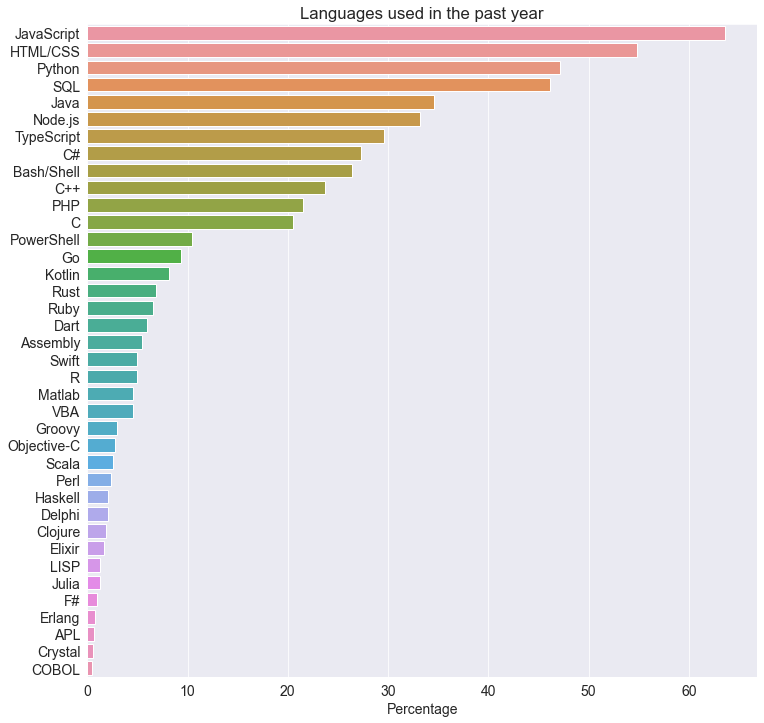

In [68]:
plt.figure(figsize=(12,12))
sns.barplot(y=list(languages_worked_with_percentage.keys()),x=list(languages_worked_with_percentage))
plt.title('Languages used in the past year');
plt.xlabel('Percentage');

#### Q. Which languages are the most people interested to learn over the next year?

In [69]:
language_interested_in_df=split_multicolumn(survey_df.LanguageWantToWorkWith)
language_interested_in_percentage=language_interested_in_df.mean().sort_values(ascending=False)*100
language_interested_in_percentage

JavaScript     43.953068
Python         41.414686
HTML/CSS       34.824243
TypeScript     31.956279
SQL            31.609919
Node.js        28.644878
C#             21.337744
Java           20.435288
Rust           18.756217
Go             18.755019
C++            18.038327
Bash/Shell     16.584571
Kotlin         12.676326
C              11.426311
PHP            10.491497
Dart            8.346217
Swift           7.532449
Ruby            5.852179
PowerShell      5.781469
R               4.743585
Assembly        4.168315
Haskell         4.054459
Elixir          4.000527
Scala           3.762030
Julia           2.899124
Clojure         2.859574
F#              2.538381
Matlab          1.844461
LISP            1.760568
Objective-C     1.656300
Erlang          1.626338
Groovy          1.393833
Perl            1.379451
VBA             1.259603
Delphi          1.151740
Crystal         0.931219
APL             0.662760
COBOL           0.361941
dtype: float64

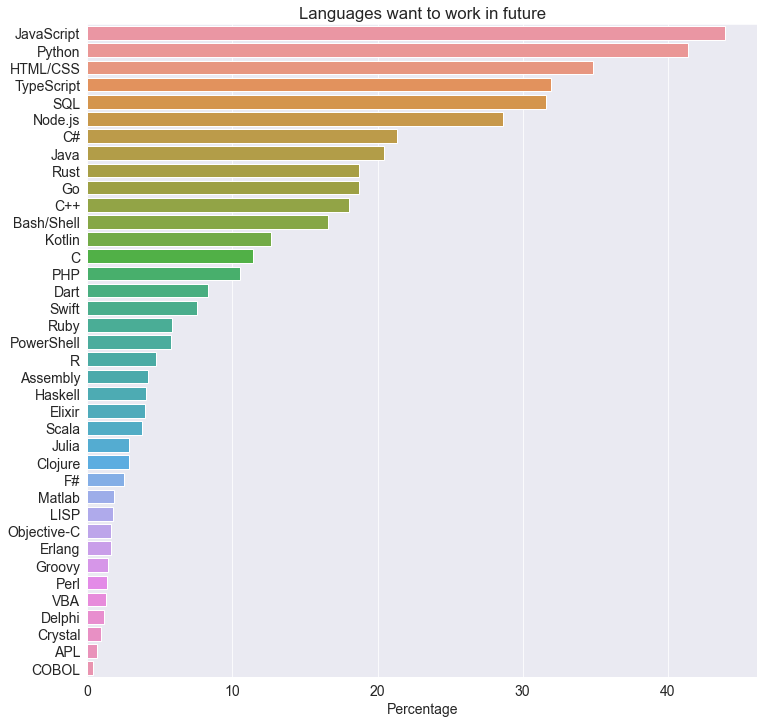

In [70]:
plt.figure(figsize=(12,12))
sns.barplot(y=list(language_interested_in_percentage.keys()),x=list(language_interested_in_percentage))
plt.title('Languages want to work in future');
plt.xlabel('Percentage');

#### Q. Which are the most loved languages i.e., a high percentage of people who have used the language want to continue learning and using it over the next year?

In [71]:
language_loved_df = language_worked_with_df & language_interested_in_df

In [72]:
language_loved_df

,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,Delphi,Elixir,Erlang,F#,Go,Groovy,HTML/CSS,Haskell,Java,JavaScript,Julia,Kotlin,LISP,Matlab,Node.js,Objective-C,PHP,Perl,PowerShell,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
83435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
83436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
83437,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
language_loved_percentage = (language_loved_df.sum()*100/language_worked_with_df.sum()).sort_values(ascending=False)

In [74]:
language_loved_percentage

Rust           86.930519
Clojure        81.462141
TypeScript     72.785888
Elixir         72.418670
Julia          71.374046
Python         67.799797
Dart           63.793103
Swift          63.699783
Node.js        63.312626
Go             62.735789
F#             62.404092
C#             61.975548
SQL            61.839027
JavaScript     61.562088
Kotlin         61.559971
HTML/CSS       60.225436
Crystal        59.694989
Bash/Shell     56.287398
LISP           55.117371
Erlang         54.488189
Ruby           53.420670
Haskell        52.893045
Scala          52.450518
APL            50.679612
C++            49.159388
Delphi         47.426901
Java           47.155963
R              44.146105
PowerShell     43.437464
PHP            40.222779
C              39.364189
Perl           35.692771
Assembly       33.502538
Groovy         31.986944
Objective-C    26.853883
Matlab         21.529968
VBA            20.478444
COBOL          15.887850
dtype: float64

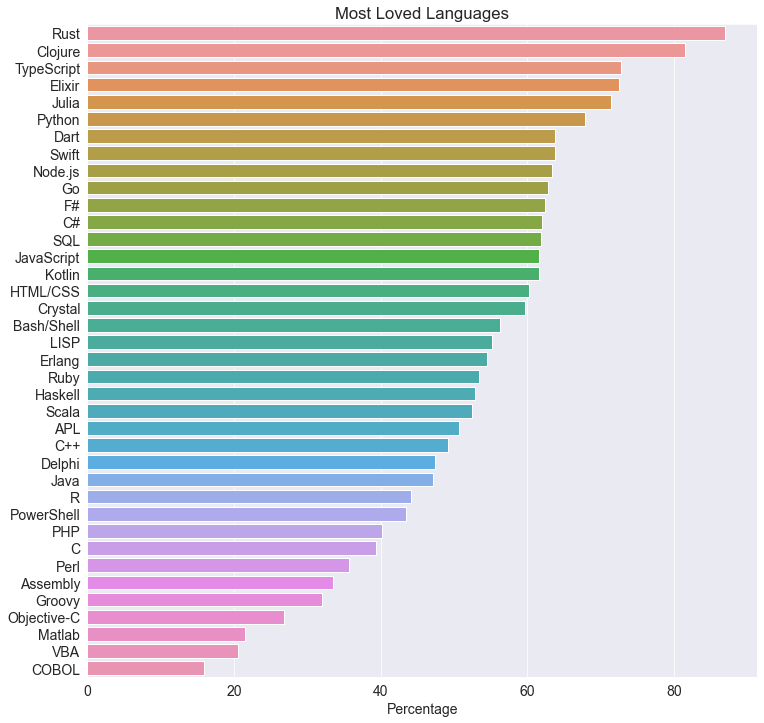

In [75]:
plt.figure(figsize=(12,12))
sns.barplot(x=language_loved_percentage,y=language_loved_percentage.index)
plt.title("Most Loved Languages")
plt.xlabel('Percentage');

#### Q. How important is to start young to build a career in programming?

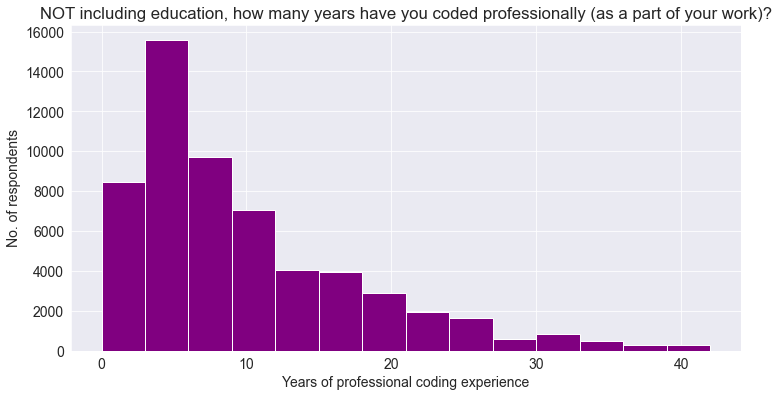

In [76]:
plt.figure(figsize=(12,6))
plt.title(schema_raw.YearsCodePro)
plt.hist('YearsCodePro',bins=np.arange(0,45,3),data=survey_df,color='purple')
plt.ylabel("No. of respondents")
plt.xlabel("Years of professional coding experience");

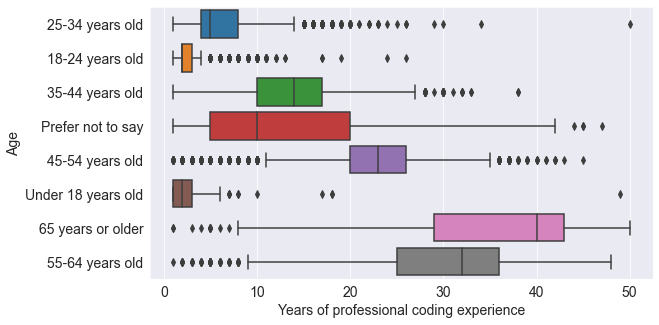

In [77]:

sns.boxplot(y='Age',x='YearsCodePro',data=survey_df)
plt.ylabel('Age')
plt.xlabel('Years of professional coding experience');

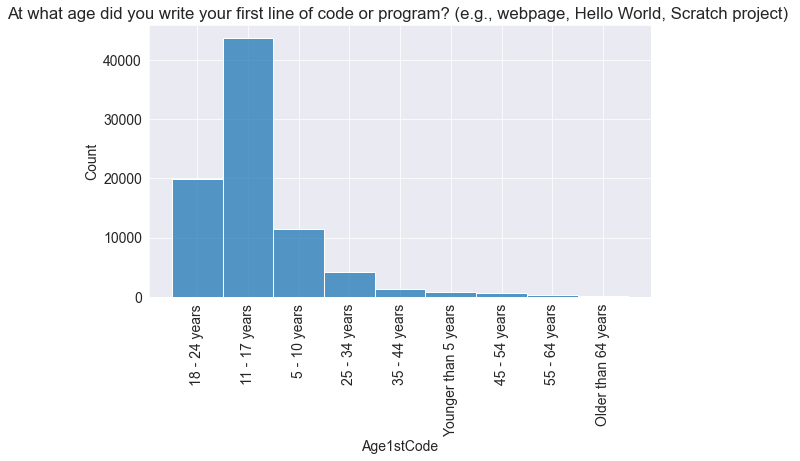

In [78]:
plt.title(schema_raw.Age1stCode)
sns.histplot(x=survey_df.Age1stCode,bins=30)
locs, labels=plt.xticks()
plt.setp(labels, rotation=90);